# Bayes Modelling for NLP
## Task 3: Profanity Check
### Data Set: Students' Collection
The objective is to train a model, which can be used for automatic detection of profanity words in text messages.<br>

### Step 1: Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


### Step 2: Dataset
We will be using a dataset collected by students in one of the previous exercises, _Mind Your Language_

In [2]:
# It is a pre-processed table with two columns - a label and a message
# Import the table into a pandas dataframe using the read_table method
df = pd.read_csv('../files/profanity.txt', sep='\t', header=None, names=['text', 'label'])

In [3]:
df.shape

(25, 2)

In [4]:
# Printing out first five rows to get idea about the data
df.head()

,text,label
0,What is HTTP? HTTP is a set of protoco...,0
1,"A web browser may be the client, and a...",0
2,"Hi, my name is Martin. This text only contain ...",0
3,This is a great assignment to learn lots of gr...,0
4,"Nam posuere mattis velit, sodales faucibus nul...",0


In [5]:
df

,text,label
0,What is HTTP? HTTP is a set of protoco...,0
1,"A web browser may be the client, and a...",0
2,"Hi, my name is Martin. This text only contain ...",0
3,This is a great assignment to learn lots of gr...,0
4,"Nam posuere mattis velit, sodales faucibus nul...",0
5,"hej med dig :D duck og saa videre,",0
6,"Hello, is it me you're looking for?,",0
7,"Fuck, this is shit,",1
8,This is a fucking great assignment to learn lo...,1
9,This design is fucking brilliant. The details ...,1


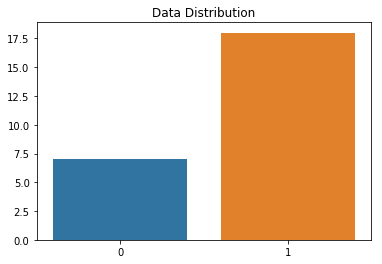

In [6]:
s = df['label'].value_counts()
sns.barplot(x=s.index, y=s.values)
plt.title('Data Distribution')
plt.show()

### Step 3: Data Preprocessing

#### Digitalize

#### Bag-of-Words

A model, which represents a piece of text, such as a sentence or a document, as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.
The words are stored as tockens, with a count of frequency of their appearance.
The process is called _vectorization_, as each document is represented as a word-count vector.
The preprocessing includes: 
- converting strings to lower case
- removing punctuation
- tokenizing the text and giving an integer ID to each token
- count the frequencies of each token
- building a sparse matrix of [documents x tokens]

<div style="width: 200px;">
![image.png](attachment:image.png)
<a href=https://www.novuslight.com/uploads/n/BagofWords.jpg>bag of words</a>
</div>

## _Model 1: CountVectorizer_

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 25
Number of rows in the training set: 18
Number of rows in the test set: 7


In [8]:
# Create an instance of CountVectorizer for vectorizing the text
count_vector = CountVectorizer()

In [9]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

In [10]:
# Transform testing data and return the matrix 
# Note we are not fitting the testing data into the CountVectorizer()
test_data = count_vector.transform(X_test)

#### Example: Vectorizing single text document
The text ['_This text is represted as a vector of text words and numbers_']<br>
like ['this', 'text', 'is', 'represented', 'as', 'a', 'vector', 'of', 'words', 'and', 'numbers']<br>
and then [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#### Example: Vectorizing multiple documents
Each text is represented as vector, and all text - in a __sparse matrix__.
To keep track of all words, used in all documents (__corpus__), a __vocabulary__ is created, where each word gets an __index__.

In [11]:
# see the mapping between words and indices
count_vector.vocabulary_

{'fucking': 67,
 'kage': 86,
 'nam': 106,
 'posuere': 125,
 'mattis': 96,
 'velit': 164,
 'sodales': 151,
 'faucibus': 58,
 'nulla': 113,
 'tincidunt': 160,
 'id': 80,
 'aliquam': 4,
 'nec': 108,
 'fringilla': 64,
 'nisi': 111,
 'maecenas': 93,
 'eget': 47,
 'nunc': 114,
 'at': 17,
 'lacinia': 87,
 'augue': 18,
 'sed': 137,
 'condimentum': 30,
 'elementum': 48,
 'est': 53,
 'gravida': 72,
 'morbi': 102,
 'ut': 162,
 'sem': 138,
 'et': 54,
 'arcu': 10,
 'dui': 45,
 'blandit': 23,
 'in': 82,
 'elit': 49,
 'mollis': 101,
 'ac': 1,
 'egestas': 46,
 'sapien': 136,
 'rhoncus': 134,
 'mauris': 97,
 'semper': 139,
 'odio': 115,
 'placerat': 124,
 'suspendisse': 154,
 'laoreet': 89,
 'pulvinar': 129,
 'finibus': 60,
 'ornare': 121,
 'vehicula': 163,
 'hi': 77,
 'my': 105,
 'name': 107,
 'is': 83,
 'martin': 95,
 'this': 159,
 'text': 155,
 'only': 119,
 'contain': 32,
 'good': 70,
 'words': 171,
 'fuck': 66,
 'hello': 76,
 'it': 85,
 'me': 99,
 'you': 174,
 're': 131,
 'looking': 91,
 'for': 62

In [12]:
# training data sparse matrix
training_data.shape

(18, 177)

In [13]:
# test data sparse matrix
test_data.shape

(7, 177)

In [14]:
# 'A' is a sparse matrix property, used for its dense numpy.ndarray representation
# We use it to visualize the matrix
training_data.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
test_data.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
# see the output of vectorization:
# (document, word index) number of occurances
print(training_data[0:5, ])

  (0, 86)	1
  (0, 67)	1
  (1, 163)	1
  (1, 121)	1
  (1, 60)	2
  (1, 129)	1
  (1, 89)	1
  (1, 154)	1
  (1, 124)	1
  (1, 115)	1
  (1, 139)	1
  (1, 97)	1
  (1, 134)	1
  (1, 136)	1
  (1, 46)	2
  (1, 1)	2
  (1, 101)	1
  (1, 49)	1
  (1, 82)	1
  (1, 23)	1
  (1, 45)	2
  (1, 10)	1
  (1, 54)	1
  (1, 138)	1
  (1, 162)	1
  :	:
  (1, 151)	1
  (1, 164)	2
  (1, 96)	1
  (1, 125)	1
  (1, 106)	1
  (2, 171)	1
  (2, 70)	1
  (2, 32)	1
  (2, 119)	1
  (2, 155)	1
  (2, 159)	1
  (2, 95)	1
  (2, 83)	1
  (2, 107)	1
  (2, 105)	1
  (2, 77)	1
  (3, 66)	1
  (4, 62)	1
  (4, 91)	1
  (4, 131)	1
  (4, 174)	1
  (4, 99)	1
  (4, 85)	1
  (4, 76)	1
  (4, 83)	1


### Step 4: Train Model

In [17]:
# Call Multinominal Naive Bayes and Train the model
model = MultinomialNB()
model.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Step 5: Test the Model

In [18]:
# Test on the test data, try prediction
y_predicted = model.predict(test_data)

In [19]:
y_predicted.shape

(7,)

In [20]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Step 6: Validate the Accuracy

In [21]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test, y_predicted)))
print('Precision score: ', format(precision_score(y_test, y_predicted)))
print('Recall score: ', format(recall_score(y_test, y_predicted)))
print('F1 score: ', format(f1_score(y_test, y_predicted)))

Accuracy score:  0.8571428571428571
Precision score:  0.8571428571428571
Recall score:  1.0
F1 score:  0.923076923076923


In [22]:
# calculate confusion matrix to evaluate the the accuracy of the prediction
cmat = confusion_matrix(y_test, y_predicted)
cmat

array([[0, 1],
       [0, 6]], dtype=int64)

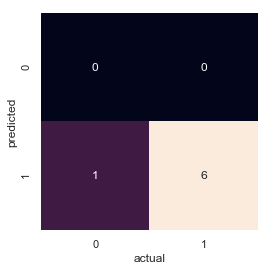

In [23]:
# visualize the confusion matrix by use of seaborn library
sns.set()
sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('actual')
plt.ylabel('predicted');
plt.show()

In [24]:
# print accuracy evaluation report
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

   micro avg       0.86      0.86      0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



C:\Users\marti\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Step 7: Implement Model 1 for New Data Prediction

In [25]:
my_text1 = ['This text uses nice words']
my_text2 = ['There is a shit text']
my_text3 = ['Hi, my name is Martin.']
my_text = my_text3

In [26]:
my_data = count_vector.transform(my_text)

In [27]:
my_predict = model.predict(my_data)

In [28]:
print(my_data)

  (0, 77)	1
  (0, 83)	1
  (0, 95)	1
  (0, 105)	1
  (0, 107)	1


In [29]:
my_predict

array([0], dtype=int64)

## <span style="color:green">Read More</span>
https://www.kaggle.com/pceccon/countvectorizer-and-tfidf-strategies